<a href="https://colab.research.google.com/github/lucas-thomaz-pessoa/da-EBAC/blob/main/An%C3%A1lise_Explorat%C3%B3ria_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploração e Análise de Dados em SQL**

####**Sobre Este Caderno**:
****
Trata-se de mais um projeto do curso de Análise de Dados da EBAC. O Objetivo principal é aplicar os conhecimentos obtidos em SQL em um caso prático. As visualizações foram feitas a partir do pacote Seaborn

####**Sobre os Dados Utilizados**:
****
Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

*   idade = idade do cliente
*   sexo = sexo do cliente (F ou M)
*   dependentes = número de dependentes do cliente
*   escolaridade = nível de escolaridade do clientes
*   salario_anual = faixa salarial do cliente
*   tipo_cartao = tipo de cartao do cliente
*   qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
*   iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
*   meses_inativo_12m = quantidade de meses que o cliente ficou inativo
*   limite_credito = limite de credito do cliente
*   valor_transacoes_12m = valor das transações dos ultimos 12 meses
*   qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses


A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em:  https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

A base de dados original possui mais linhas do que a que foi utilizada. Optou-se por essa redução para reduzir os gastos de utilização dos serviços da AWS, de forma que fosse mais fácil utilizar uma abordagem mais experimental e adequada a pessoas que estão aplicando os seus conhecimentos pela 1ª vez.


## 1. **Entendendo a Base de Dados**

Para iniciar a análise é sempre uma boa ideia ter uma noção global da base de dados. Para isso, vamos realizar uma consulta selecionado a quantidade de linhas que temos no toal, bem  como a quantidade no sexo feminino e no sexo masculino. Para isso, utilizamos a Query:
****

SELECT COUNT(*) FROM credito, obtivemos como resposta 2564.
****
Para separar o valor total por sexo, fizemos a consulta a seguir:

****
SELECT COUNT(*) AS quantidade, sexo FROM credito GROUP BY sexo;
****


O resultado obtido foi o seguinte:
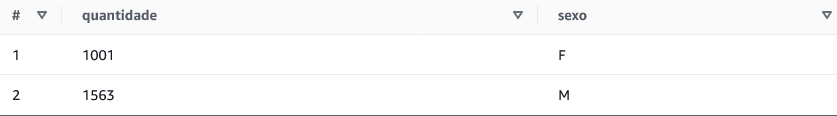

* Represntando graficamente:



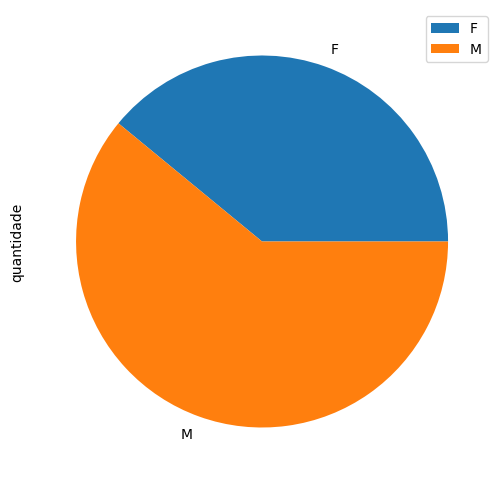

Observações:
****
É possível notar que o somatório de ambos os sexos corresponde ao total de linhas, o que siguinifica que não obtivemos valores nulos quanto ao sexo.


Além disso, há uma maioria de clientes do sexo masculino.

### 1.1 **Separando os clientes por faiza salarial**

Entender a faixa salarial de cada cliente é um ponto central para a definição do tipo de cartão e do tipo de limite de crédito que será conferido ao cliente. Separamos essa informação a partir deste código:


****
SELECT COUNT(*) AS quantidade, salario_anual FROM credito GROUP BY salario_anual;
****

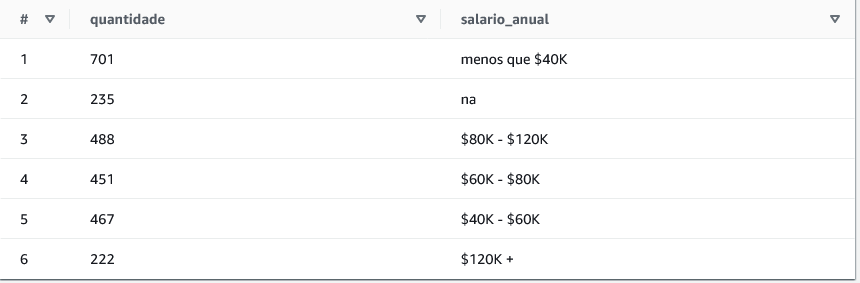

* Representando Graficamente:

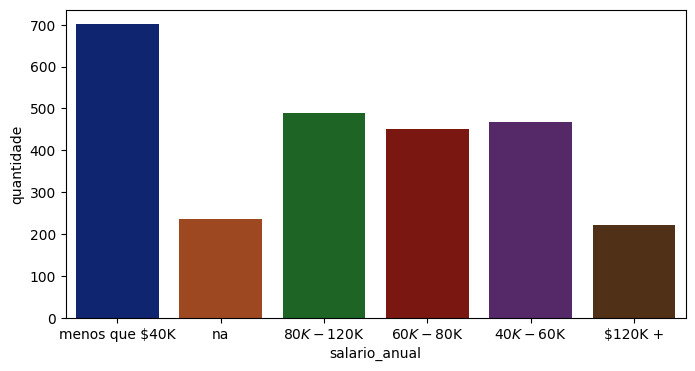

Observações:
****
Ao analisarmos os valores obitidos, percebemos que as informações que temos são de faixas salariais e não o valor específico do salário de cada clliente.

É notável que há uma concentração maior de clientes na faixa de salário anual inferior a 40k e uma minoria de cientes na faixa que recebe 120k ou mais por ano. As demias faixs de salário possuem uma distribuição mais uniforme.

Chama atenção a quantidade de valores nulos. Em boa verdade, há mais valores nulos do que clientes na faixa salarial mais alta.

### 1.2 **Separando as faixas salariais por sexo**

Para aprimorarmos a análise, podemos separar os grupos obitidos na última análise por sexo com o intuíto de averiguar se há uma tendência. Isso pode ser feito a partir desta consulta
****
SELECT sexo, salario_anual, COUNT(salario_anual) AS quantidade FROM credito GROUP BY sexo, salario_anual
****

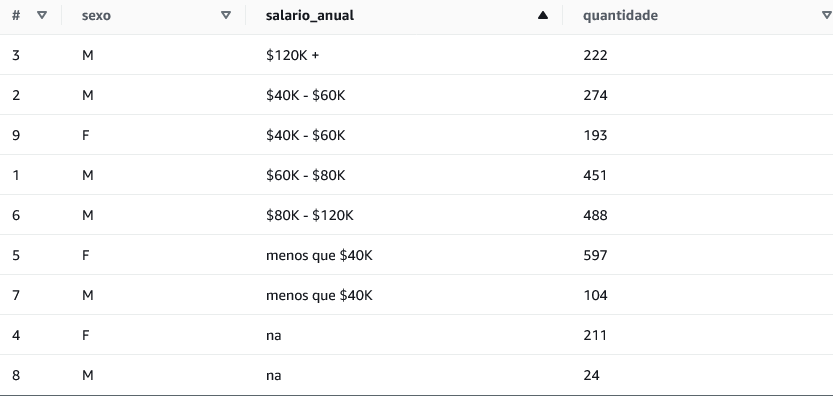

* **Representando graficamente**:

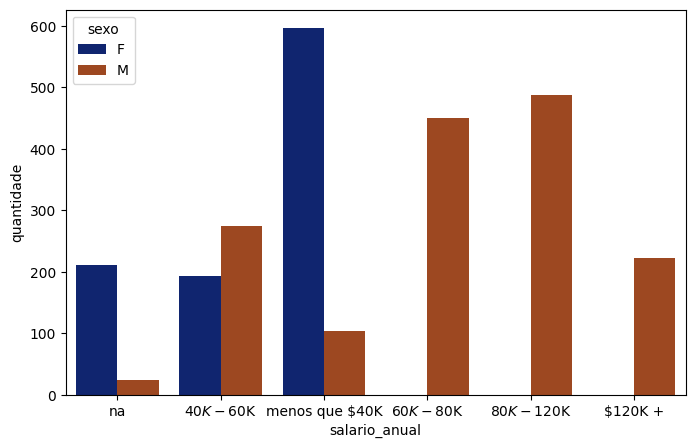

Observações
****
Chama a atenção a ausência de mulheres nas 3 maiores faixas salariais.

Além disso o número de mulheres sem a faixa salarial identifiada é 10x superior ao de homens.

Por fim, chama atenção da faixa salarial dos que recebem menos de 40k por ano ser composta em sua ampla maioria por mulheres, quase 60% das mulheres da nossa base de dados ocupa esse faixa salarial.

### 1.3 **Entendendo qual tipo de cartão cada cliente possui**

Uma vez que já temos uma noção geral a respeito dos clientes, podemos entender qual tipo de serviços eles consomeme. Vamos separa os clientes a partir do tipo de cartão. Observe a query utilizada e o seu resultado a seguir
****
SELECT sexo, tipo_cartao, COUNT(tipo_cartao) AS quantidade FROM credito GROUP BY sexo, tipo_cartao;
****

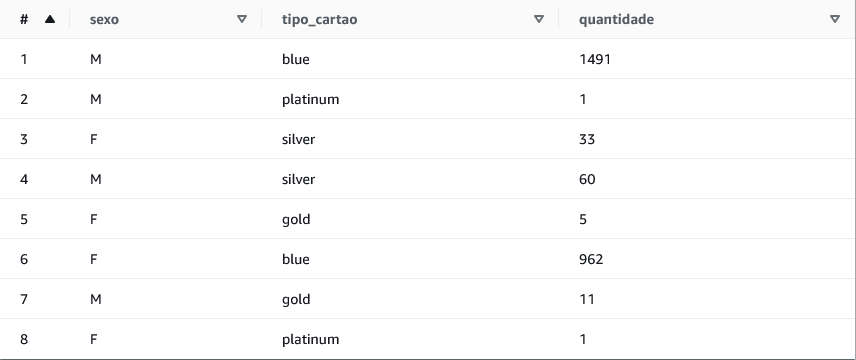

* Representando Graficamente

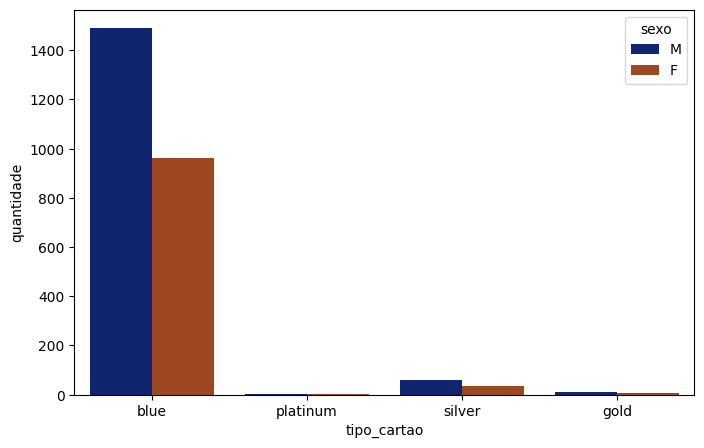

Observações
****
Chama atenção a concentração no tipo de cartão Blue, principalmente entre homens, pois, no geral possuem faixa salarial superior a de mulheres.

Outro fato digno de nota é que apenas dois clientes possuem um cartão platinum, representando uma fração muito pequena de clientes. Além disso, menos de 10% dos clientes possuem um cartão gold.

## 2. **Perguntando aos dados**

A partir do que observamos, podemos fazer diversas perguntas e buscar respostas ou teses possíveis a partir da base de dados.

### 2.1 **As mulheres gastam mais do que os homens ?**

A pergunta a seguir surge a partir do fato de que hos homens, apesar de ganharem mais, possuem cartões de crédito mais básicos, proporcionalmente, o que pode sugerir um comportamento mais comedido nas compras. Por outro lado, as mulheres, mesmo se concentrando nas faixas salarias mais baixas, utilizam cartões com mais recursos.

Para tentar responder essa pergunta vamos consultar a média de valores gastos, bem como as compras de maior e menor valor a partir da seguinte query:
****
SELECT MAX(valor_transacoes_12m) AS maior_valor_gasto, AVG(valor_transacoes_12m) AS media_valor, MIN(valor_transacoes_12m) AS min_valor_gasto, sexo FROM credito GROUP BY SEXO;
****

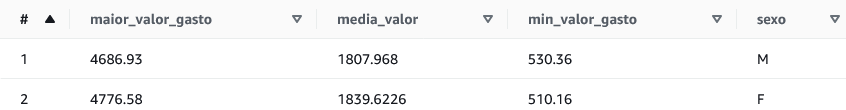

* **Representando graficamente a média por sexo**

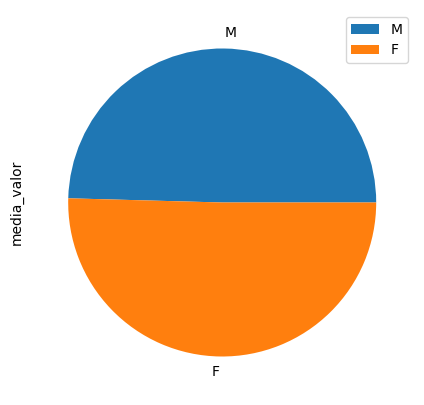

Observações:
****
Como é possível notar, há pouca diferença entre Homens e Mulheres no que diz respeito a média de valores gastos, não sendo esse o motivo para os Homens se concentrarem no cartão mais básico.

### 2.2 **A mesma tendência de equilíbrio na Média de valores gastos se verifica ao se isolar as faixas salariais?**

Isso é relevante de se perguntar, pois, como as 3 faixas salarias mais altas são ocupadas unicamente pelos homens, a faixa salarial de mais baixa é formada em sua ampla maioria por mulheres, nesse sentido a média pode distorcer algumas tendências específicas de determinadas faixas salarias

Para respondermos esse questionamento, utilizaremos a query a seguir:

****
SELECT AVG(qtd_produtos) AS qtd_produtos, AVG(valor_transacoes_12m) AS media_valor_gasto, AVG(limite_credito) AS media_limite, sexo, salario_anual FROM credito WHERE salario_anual != 'na' GROUP BY sexo, salario_anual ORDER BY AVG(valor_transacoes_12m) desc;
****

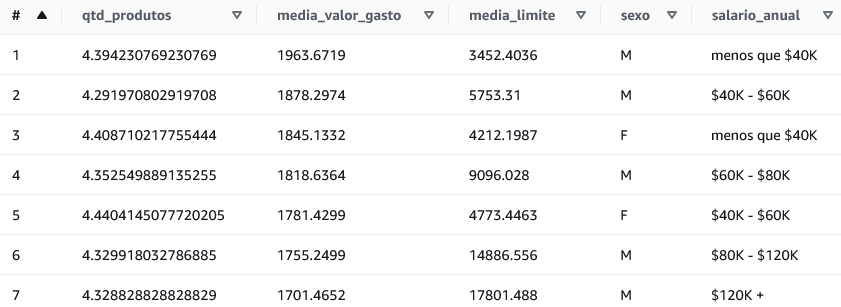

* Representando Graficamente a Média de cada sexo por faixa salarial

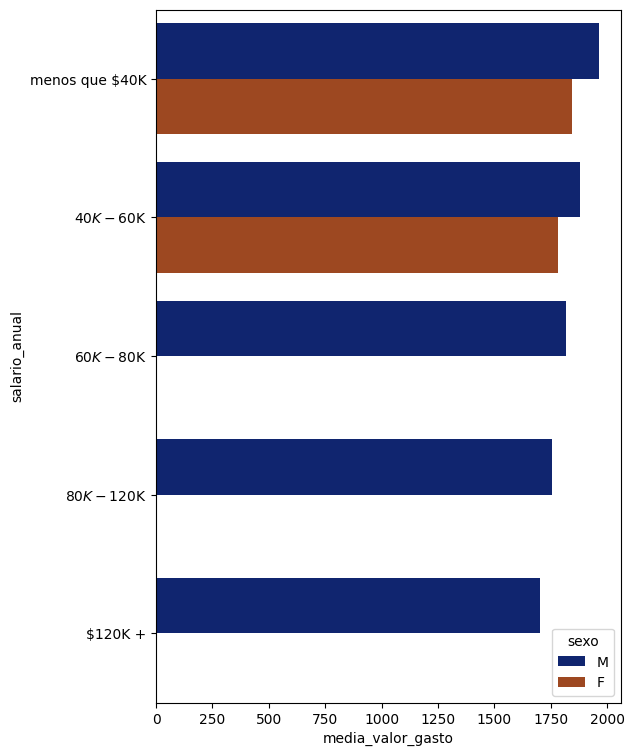

Observações:
****
Analisando a última consulta, percebemos que as mulheres gastam menos que os homens da mesma faixa salaria.

O valor médio global se aproxima entre ambos os sexos pois há uma tendência de, quanto maior for a faixa salarial, menor ser o gasto.

### 2.3 **Os limites de crédito são distribuídos na mesma proporção do número de compras nas diferentes faixas salarias?**

Utiliando a mesma consulta que a pergunta anterior, podemos averiguar se o limite de crédito se dá na mesma proporção do número de gastos por faixa salarial.

* **Representando Graficamente**

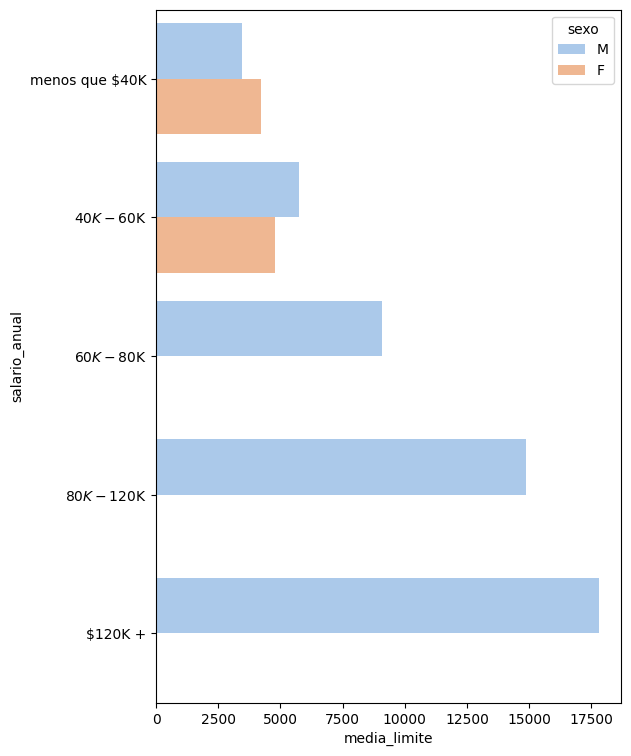

Observaçõe:
****
No geral, parece haver uma tendência inversa em relação a média de compras. Enquanto a tendeência do média de valor de compras é reduzir conforme sobe a faixa salarial, o limite de crédito aumenta conforme para os salários mais altos.

Essas tendências podem ser explicadas pois as pessoas que possuem um salário maior dispões de maio dinheiro e, por conta disso, dependem menos do crédito, faz sentindo aumentar o limite de crédito para essas pessoas como incentivo a utilização desse tipo de serviço.

É curioso notar que, na menor faixa de salário, o limite de crédito das mulheres sejam superiores aos dos homens, provavelmente isso ocorre por conta da maior concentração de mulheres nessa faixa, permitindo que a média seja superior.

Chama atenção a proximidade do limite médio de crédito dado há mulheres na faixa inferior a 40 k e na faixa de 40k a 60k.

###2.4 **Há correlação entre o tipo de cartão e o limite de crédito?**

Uma das hipóteses levantadas para o fato das mulheres possuírem um limite maior que os homenes na menor faixa salarial foi o acesso a cartões mais avançados, nesse sentido, é interessante averiguar se o limite de crédito conferido aumenta a partir do cartão.

Vamos averiguar esssa hipótese com a seguinte consulta
****
SELECT AVG(valor_transacoes_12m) AS media_transacoes_12m, AVG(limite_credito) AS media_limite, sexo, tipo_cartao FROM credito GROUP BY sexo, tipo_cartao ORDER BY tipo_cartao
****

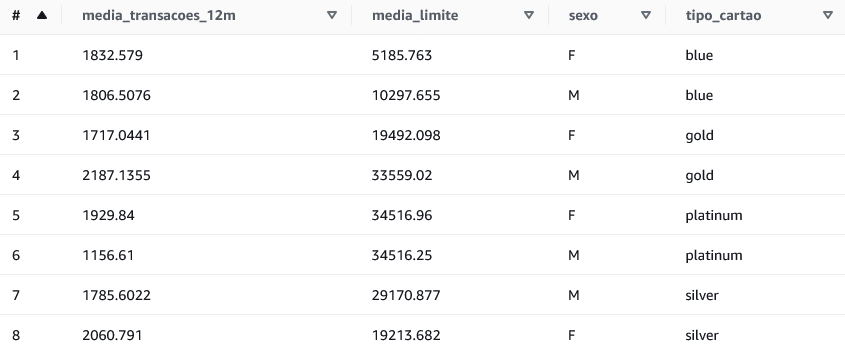

* Representando graficamente

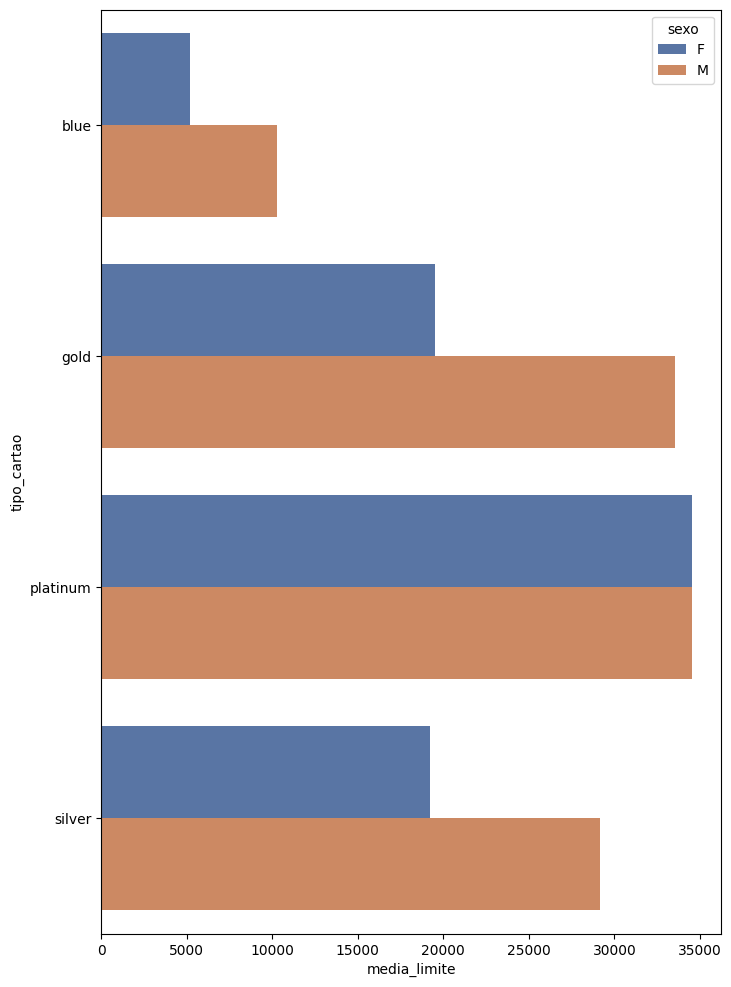

Observações
****
Quando comparamos essa consulta com a anterior, podemos extrair conclusões interessantes. Os Homens que possuem o carão BLUE possuem um limite de crédito maior que as mulheres com o mesmo cartão. Provavelmente isso ocorre por conta dos homens ocuparem faixa salariais maiores, contudo esse aumento parece sofrer algum limite pelo tipo de cartão pois reparamos que o limite de crédito sobe na medida em que o muda o tipo de cartão.

Ressalta-se que o limite de crédito médio para homens que possuem o cartão Silver é quase 3 vezes o valor de limite de crédito médio dos clientes que possuem o cartão Blue.

Contudo, é interessante notar que o limite de crédito ofertado para mulheres nos cartões Silver e Gold é praticamente idêntica, em que pese a amostragem ser baixa.

###2.5 **O que o tipo de cartão pode dizer sobre o comportamento de consumo de cada cliente?**

Utilizando a consulta anterior, podemos averiguar se o tipo de cartão implica em uma tendência de consumo maior ou menor

* **Representando Graficamente**:

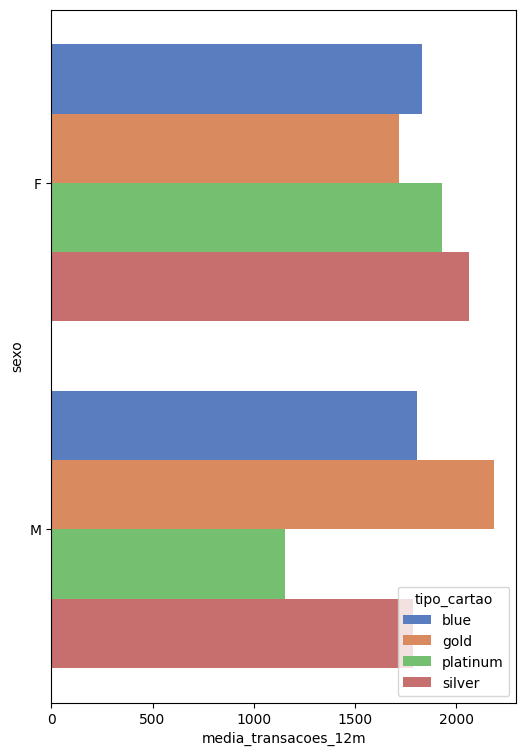

Observações
****
Nesse contexto, é interessante notar que o Consumo médio entre os que possuem o cartão blue é praticamente idêntico, independentemente do sexo.

Outro fato digno de nota é como os homens que possuem cartão silver e blue possuem uma média de gastos semelhante.

Seria interessante averiguar se alguns membros que possuem carão Blue podem receber algum tipo de upgrade, vez que os clientes se concentram muito nesse cartão.

### 2.6 **Há alguma margem para que clientes com cartões mais básicos migrem para produtos mais avançados ?**

Como é notória a concentração de clientes nos cartões do tipo "blue", será interessante observar esse grupo em destaque, para averiguar qual a possibilidade desse clientes migrarem para outros tipos de cartão.

Para isso usamos a seguinte query:
****
SELECT COUNT(*) AS CONTAGEM, sexo, salario_anual, tipo_cartao FROM credito WHERE tipo_cartao IN ('blue') GROUP BY salario_anual, sexo, tipo_cartao;
****

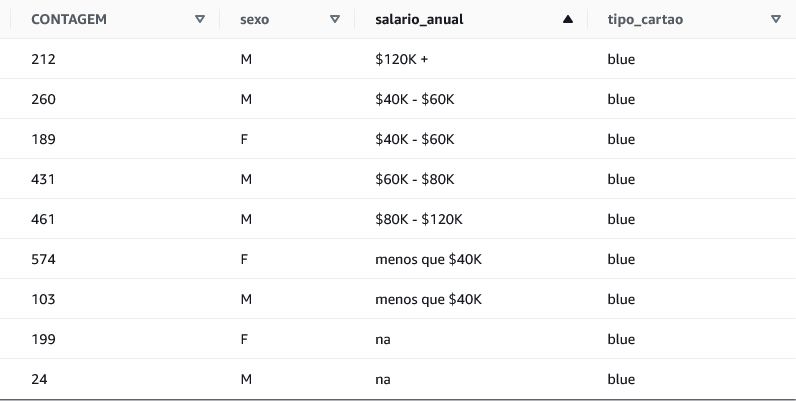

Observações
****
Há uma parcela siguiificativa de homens nas maiores faizas salarias com cartões básicos. Dos 222 homens que recebem 120k, 212 possuem cartões básicos; Dos 488 que recebem de 80k a 120k, 461 possuem o cartão mais básico e dos 451 que recebem de 60k a 80k, 431 possuem o cartão blue.

## 3. **Conclusão**

Conforme observado, há uma tendência de se utilizar menos o cartão de crédito na medida em que se aumenta de faixa salarias. Para estimular os clientes a utilizarem mais os serviços de crédito, se oferece limites maiores de crédito, contudo só isso parece não ser o suficiente.

Existem muitos clientes com cartões básicos havendo margem para evolução de outros serviços. Seria plausível realizar uma campanha focada nos Homens de compreendidos nas 3 maiores faixas salarias, uma vez que já estão em grupos que tradicionalmente possuem maior limite de crédito.

A maior proporção de mulheres sem o salário anual especificado pode representar o costume das mulheres serem designadas para funções de trabalhos domésticos e com menos chances no mercado de trabalho.